In [1]:
import cv2
import numpy as np

In [2]:
img = cv2.imread('sample.jpg')

In [3]:
def get_black_boundaries(img, expected_width=16):
    '''
    want a grayscale image, (h, w) format
    '''
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(img, (5, 5), 0)
    _, bw = cv2.threshold(blur, 127, 255, cv2.THRESH_OTSU)
    upper = np.mean(bw[0:5], axis=0)
    
    black_keys = []

    last = -1

    for i, x in enumerate(upper):
        if x <= 255 / 5:
            if last == -1:
                last = i
        else:
            if last != -1:
                black_keys.append([last, i - 1])
                last = -1

    for i, coor in enumerate(black_keys):
        x, y = coor
        offset = (expected_width - (y - x + 1)) // 2
        coor[0] = x - offset
        coor[1] = y + (expected_width - (y - x + 1) - offset)
    
    return np.array(black_keys)


[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


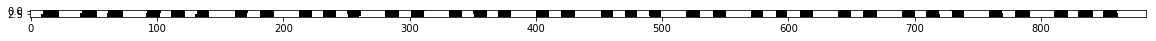

In [14]:
_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(_img, (5, 5), 0)
_, bw = cv2.threshold(blur, 127, 255, cv2.THRESH_OTSU)
_bw = bw[0:5]

import matplotlib.pyplot as plt

print(_bw)
plt.figure(figsize=[20, 40])
plt.imshow(cv2.cvtColor(_bw, cv2.COLOR_GRAY2RGB))
cv2.imwrite('test.jpg', _bw)
plt.show()